# Динамическое программирование, метод итерации по стратегии

#### Задача: Найти стратегию передвижения для агента из точки поля (7,7) к поставленной цели.

За передвижение агент получает штраф -1;
За достижение цели награду - +10;

* State - ?

* Actions - ?

* Reward - ?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
field_size = (7, 7)

passenger = np.random.randint(0, 7, size=2)

car = np.random.randint(0, 7, size=2)
target = np.random.randint(0, 7, size=2)



## Детерминированная итерация по стратегии

1. Инициализировать стратегию произвольно.
2. Повторять до сходимости {
    2.1 Оценка стратегии:
        Для каждого состояния s во множестве всех состояний S:
            Вычислить V(s) как ожидаемую сумму дисконтированных вознаграждений, следуя текущей стратегии.
    2.2 Улучшение стратегии:
        Для каждого состояния s в S:
            Выбрать действие a, максимизирующее ожидаемую сумму дисконтированных вознаграждений.
            Обновить стратегию для состояния s с выбранным действием a.
}


In [ ]:
# Действия: вверх, вниз, влево, вправо
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

def step(state, action):
    next_state = (state[0] + action[0], state[1] + action[1])
    if next_state[0] < 0 or next_state[0] >= field_size[0] or next_state[1] < 0 or next_state[1] >= field_size[1]:
        return state # Столкновение со стеной
    else:
        return next_state

def in_boundaries(state):
  return state[0] < 0 or state[0]>=7 or state[1] < 0 or state[1]>=7

def reward(state):
    if state == tuple(target):
        return 10
    elif in_boundaries(state):
        return -1000
    else:
        return -1


def policy_iteration():
    policy = np.zeros(field_size, dtype=(int, 2))
    V = np.zeros(field_size)
    gamma = 0.99
    is_policy_stable = False
    threshold = 0.001

    while not is_policy_stable:
        # Оценка стратегии
        while True:
          delta = 0
          for x in range(field_size[0]):
              for y in range(field_size[1]):
                  v = V[x, y]
                  V[x, y] = max([reward((x, y)) + gamma * V[step((x, y), a)] for a in actions])
                  delta = max(delta, abs(v - V[x, y]))
          if delta < threshold:
              break
        # Улучшение стратегии
        is_policy_stable = True
        for x in range(field_size[0]):
            for y in range(field_size[1]):
                old_action = policy[x, y]
                policy[x, y] = actions[np.argmax([reward((x, y)) + gamma * V[step((x, y), a)] for a in actions])]
                if tuple(old_action) != tuple(policy[x, y]):
                    is_policy_stable = False
    return policy

In [ ]:
policy_iteration()

array([[[ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 1,  0],
        [ 1,  0],
        [ 1,  0],
        [ 1,  0]],

       [[ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0, -1],
        [ 0, -1],
        [ 0, -1]],

       [[ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [-1,  0],
        [ 1,  0],
        [ 1,  0],
        [ 1,  0]],

       [[ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0, -1],
        [ 0, -1]],

       [[ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [-1,  0],
        [ 0, -1],
        [ 0, -1]],

       [[ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [-1,  0],
        [ 0, -1],
        [ 0, -1]],

       [[ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [-1,  0],
        [ 0, -1],
        [ 0, -1]]])

In [ ]:



# Действия: вверх, вниз, влево, вправо
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

def draw_policy(policy, passenger, car, target, field_size=(7, 7)):
    fig, ax = plt.subplots()
    # Отрисовка сетки
    ax.set_xlim(0, field_size[0])
    ax.set_ylim(0, field_size[1])
    plt.grid(True)
    plt.xticks(np.arange(0, field_size[0], 1))
    plt.yticks(np.arange(0, field_size[1], 1))

    # Настройка внешнего вида стрелок
    arrow_properties = dict(facecolor="black", width=0.2, head_width=0.4, head_length=0.1)

    # Отрисовка стратегии
    for x in range(field_size[0]):
        for y in range(field_size[1]):
            dy,dx = policy[x, y]
            dx/=2
            dy/=2
            ax.arrow(y+0.5-dx, x+0.5-dy, dx, dy, **arrow_properties)

    td = 0.5
    markersize = 15

    ax.plot(car[1]+td, car[0]+td, 'ro', markersize=markersize)  # C - красный
    ax.text(car[1]+td, car[0]+td, 'C', ha='center', va='center', color='white')

    ax.plot(target[1]+td, target[0]+td, 'bo', markersize=markersize)  # T - синий
    ax.text(target[1]+td, target[0]+td, 'T', ha='center', va='center', color='white')

    plt.gca().invert_yaxis()  # Инвертирование оси Y для соответствия обычным координатам
    plt.axis('off')  # Скрытие осей
    plt.show()

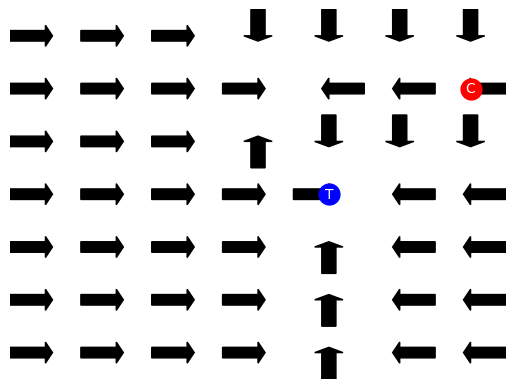

In [ ]:

draw_policy(policy_iteration(), passenger, car, target, field_size=(7, 7))

## Стохастическая итерация по стратегии

1. Инициализировать стохастическую стратегию для каждого состояния (например, равномерно распределенную вероятность выбора любого действия).
2. Повторять до сходимости:
    2.1 Оценка стратегии:
        а. Инициализировать V(s) для всех s в S произвольно (кроме терминальных состояний, если таковые имеются).
        б. Повторять до сходимости для каждого состояния s в S:
            i. Вычислить V(s) используя текущую стратегию и ожидаемую сумму дисконтированных вознаграждений, учитывая стохастичность выбора действий.
    2.2 Улучшение стратегии:
        а. Для каждого состояния s в S:
            i. Для каждого возможного действия a в A:
                - Вычислить ожидаемую полезность действия a, используя V(s).
            ii. Обновить вероятности выбора действий в соответствии с вычисленными ожидаемыми полезностями (например, пропорционально экспонентам ожидаемых полезностей или выбрать действие с максимальной ожидаемой полезностью с определенной вероятностью).


In [ ]:
def reward(state):
    if state == tuple(target):
        return 10
    elif state == tuple(passenger):
        return 10
    elif in_boundaries(state):
        return -1000
    else:
        return -1

def softmax(x):
    """Вычисление softmax для списка значений."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def stochastic_policy_improvement(V, gamma=0.99):
    policy = np.zeros(field_size, dtype=object)  # Используем dtype=object для хранения массивов вероятностей
    for x in range(field_size[0]):
        for y in range(field_size[1]):
            action_values = np.array([reward((x, y)) + gamma * V[step((x, y), a)] for a in actions])
            action_probabilities = softmax(action_values)
            policy[x, y] = action_probabilities  # Теперь policy[x, y] хранит массив вероятностей
    return policy


def stochastic_policy_iteration():
    policy = np.full(field_size, None, dtype=object)  # Инициализируем policy как массив None для сохранения массивов вероятностей
    V = np.zeros(field_size)
    gamma = 0.99
    is_policy_stable = False
    threshold = 0.001
    for i in range(50):
        # Оценка стратегии с учетом стохастичности
        while True:
            delta = 0
            for x in range(field_size[0]):
                for y in range(field_size[1]):
                    v = V[x, y]
                    # Гарантируем, что action_probabilities всегда итерируем
                    action_probabilities = policy[x, y] if policy[x, y] is not None else np.ones(len(actions)) / len(actions)
                    # Важно: используем zip(actions, action_probabilities) корректно
                    V[x, y] = sum([p * (reward(step((x, y), a)) + gamma * V[step((x, y), a)]) for a, p in zip(actions, action_probabilities)])
                    delta = max(delta, abs(v - V[x, y]))
            if delta < threshold:
                break
        # Улучшение стратегии
        new_policy = stochastic_policy_improvement(V, gamma)
        # Проверяем, изменилась ли стратегия
        is_policy_stable = all(np.array_equal(policy[x, y], new_policy[x, y]) for x in range(field_size[0]) for y in range(field_size[1]))
        policy = new_policy
    return policy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Действия: вверх, вниз, влево, вправо
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
action_labels = ['↑', '↓', '←', '→']

def draw_stochastic_policy(policy, passenger, car, target, field_size=(7, 7)):
    fig, ax = plt.subplots()
    # Отрисовка сетки
    ax.set_xlim(0, field_size[0])
    ax.set_ylim(0, field_size[1])
    plt.grid(True)
    plt.xticks(np.arange(0, field_size[0], 1))
    plt.yticks(np.arange(0, field_size[1], 1))

    for x in range(field_size[0]):
        for y in range(field_size[1]):
            for action_index, (dy, dx) in enumerate(actions):
                action_prob = policy[x, y][action_index]
                # Настройка внешнего вида стрелок на основе вероятности действия
                arrow_width = 0.01 + 0.2 * action_prob  # Жирность стрелки коррелирует с вероятностью
                arrow_head_width = 0.2 + 0.4 * action_prob
                arrow_head_length = 0.1 + 0.2 * action_prob
                arrow_properties = dict(facecolor="black", width=arrow_width, head_width=arrow_head_width, head_length=arrow_head_length)

                ax.arrow(y + 0.5, x + 0.5, dx * 0.3, dy * 0.3, **arrow_properties)

    # Размещение символов для автомобиля и цели
    td = 0.5
    markersize = 15

    #  # Размещение символов для пассажира, автомобиля и цели
    ax.plot(passenger[1]+td, passenger[0]+td, 'go', markersize=markersize)  # P - зеленый
    ax.text(passenger[1]+td, passenger[0]+td, 'P', ha='center', va='center', color='white')

    ax.plot(car[1]+td, car[0]+td, 'ro', markersize=markersize)  # C - красный
    ax.text(car[1]+td, car[0]+td, 'C', ha='center', va='center', color='white')

    ax.plot(target[1]+td, target[0]+td, 'bo', markersize=markersize)  # T - синий
    ax.text(target[1]+td, target[0]+td, 'T', ha='center', va='center', color='white')

    plt.gca().invert_yaxis()  # Инвертирование оси Y для соответствия обычным координатам
    plt.axis('off')  # Скрытие осей
    plt.show()

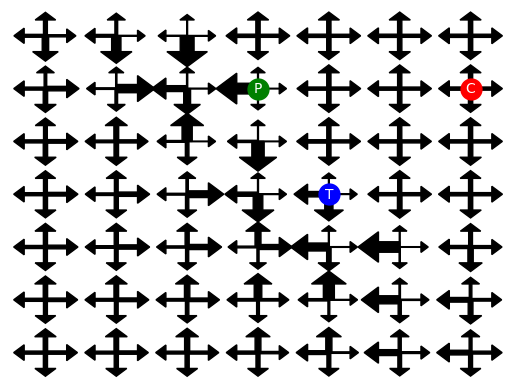

In [ ]:
policy = stochastic_policy_iteration()
draw_stochastic_policy(policy, passenger, car, target, field_size=(7, 7))

## Добашняя работа


Задача: Найти оптимальную стратегию перемещения таксиста по городу Новинск, используя марковский процесс принятия решений.

Описание:
В городе Новинск таксист ездит по решётчатому участку, состоящему из 5x5 ячеек. Он может перемещаться на одну ячейку вверх, вниз, влево или вправо (если не находится на границе). В определённых ячейках находятся пассажиры, а в других ячейках — места назначения.

Детали:
Всего 4 возможных места, где может находиться пассажир (A, B, C, D).
Есть 4 соответствующих места назначения (a, b, c, d).
Пассажир может находиться в любом из четырех мест (A, B, C, D) и желать доехать до любого из четырёх мест назначения.
Таксист получает +10 очков за каждого успешно доставленного пассажира до его пункта назначения и -1 за каждое движение. Если таксист приезжает на ячейку с пассажиром, он автоматически забирает его.


**По сути необходимо найти наилучшей порядок развозки пассажиров!**


Что нужно сдать:
Описание задачи как марковского процесса принятия решений (МППР), включая состояния, действия, награды и переходы между состояниями.
Код, включающий:
Код процесса обучения, реализующего выбранный итеративный метод (например, итерацию по значению или итерацию по стратегии), пример запуска кода обучения (чтобы легко можно было запустить)
Код инференса, демонстрирующий работу обученной стратегии на разных вариантах поля.

Критерии оценивания:
Корректность описания МППР (учтены все комбинации состояний,
для каждого состояния определены возможные действия, вероятности переходов корректно установлены, награды за действия и переходы четко определены)

Код обучения запускается без ошибок.
Код инференса запускается без ошибок.
Решение должно набирать больше очков, чем бейзлайн решение на 5 вариантах поля (скрипт для проверки будет выдан).


Подсказка:
Рассмотрите каждую возможную комбинацию местоположения такси, местоположения пассажира и пункта назначения пассажира как отдельное состояние. Например, если таксист находится на ячейке (2, 2), пассажир находится в месте B и желает доехать до места c, это одно из возможных состояний.


*Hints*


Пусть есть случайный запрос по транспортировке - Ab Bc Cd Da (т.е. пассажиры (A, B, C, D) хотят добраться до мест(b, c, d, a) соответсвенно. Тогда возможные состояния можно записать так:


```

states = [0 - start_position [0, 0, 0, 0],
         1 - [1, 0, 0, 0],
         2 - [0, 1, 0, 0],
         3 - [0, 0, 0, 1],
         4 - [1, 0, 0, 2],
         5 - [2, 0, 0, 1]
         ...
         ]
```


Действия в задаче - заказы, которые можно взять


```
actions = [1, 2, 3, 4]

```

Вознаграждение - штраф, звычисляемый как расстояние до точки где находится пассажи + расстояние до точки направления:


```
reward =  - dist(previos_place, pessanger) + dist(pessanger, new_place)

```


* Какую стратегию лучше использовать?